<a href="https://colab.research.google.com/github/carvesco/Cripto2020-II/blob/main/SHA_512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHA 512
Recibe entradas menores a 2^128 y gnera una salida de 512 bits, la entrada se procesa en bloques de 1024 bits

**Etapa 1**\
Padding de bits y longitud




In [ ]:
import binascii
import numpy as np
from array import array
#funcion de padding del mensaje
def padd(msg):
  binmsg=bin(int.from_bytes(msg.encode(), 'big'))
  binmsg=binmsg.split('b')[1]
  binmsg='0'+binmsg
  lmsg=len(binmsg)
  a=int(lmsg/1024)
  binmsg=binmsg+'1'
  for i in range(1,(1024*a)+896-lmsg):
    binmsg=binmsg+'0'
  lmsg=format(lmsg,'0128b')
  #print(lmsg)
  binmsg=binmsg+lmsg  
  return binmsg



**Inicialización del buffer**\
Se incializa un buffer de 512 bits con los siguientes 8 valores de 64 bits:\
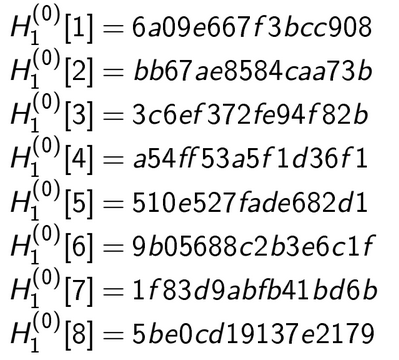

In [ ]:
#funcion hex to binary
def hexbufbin(hex):
  bufbin=bin(int(hex, 16))[2:].zfill(len(hex)*4)
  return bufbin



**Funcion de compresión**\
FUNCIONES:\
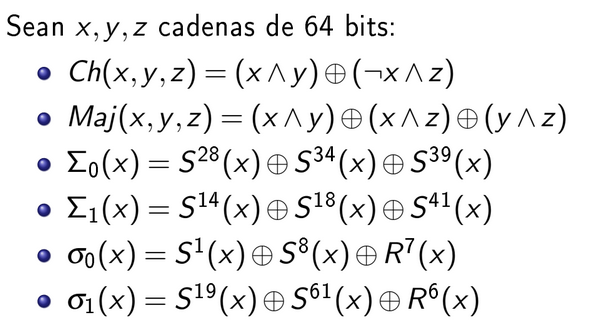

In [ ]:
def Ch(x,y,z):
  l=len(x)
  x=int(x,2)
  y=int(y,2)
  z=int(z,2)
  ans=((x & y)^(~x & z))
  ans=bin(ans)[2:].zfill(l)
  return ans

def Maj(x,y,z):
  l=len(x)
  x=int(x,2)
  y=int(y,2)
  z=int(z,2)
  ans=(x & y)^(x & z)^(y & z)
  ans=bin(ans)[2:].zfill(l)
  return ans

#funcion para desplazamiento ciclico a la derecha de y bits en la cadena x
def ror(x,y):
  ind=len(x)-y
  a=x[ind:]
  b=x[:ind]
  x=a+b
  return x
#funcion para el desplazamiento a la derecha de y bits en la cadena x 
def R(x,y):
  x=int(x,2)
  x=x>>y
  return x

def SIGMA0(x):
  l=len(x)
  a=int(ror(x,28),2)
  b=int(ror(x,34),2)
  c=int(ror(x,39),2)
  ans=a^b^c
  ans=bin(ans)[2:].zfill(l)
  return ans

def SIGMA1(x):
  l=len(x)
  a=int(ror(x,14),2)
  b=int(ror(x,18),2)
  c=int(ror(x,41),2)
  ans=a^b^c
  ans=bin(ans)[2:].zfill(l)
  return ans

def sigma0(x):
  l=len(x)
  a=int(ror(x,1),2)
  b=int(ror(x,8),2)
  c=R(x,7)
  ans=a^b^c
  ans=bin(ans)[2:].zfill(l)
  return ans

def sigma1(x):
  l=len(x)
  a=int(ror(x,19),2)
  b=int(ror(x,61),2)
  c=R(x,6)
  ans=a^b^c
  ans=bin(ans)[2:].zfill(l)
  return ans

#funcion que devuelve las w para los bloque x 
def Ws(x):
  w = np.empty(80, dtype=object)
  for i in range(0,80):
    if (i<16):
      a=i*64
      b=64*(i+1)
      #print(a,b)
      w[i]=x[a:b]
    else:
      wt=int(sigma1(w[i-2]),2)+int(w[i-7],2)+int(sigma0(w[i-15]),2)+int(w[i-16],2)
      wt=bin(wt)[2:].zfill(64)
      w[i]=wt
      if len(w[i])>64:
        c=len(w[i])-64
        w[i]=w[i][c:]
        #print(w[i])
        
  #print(w)
  return w  



**Constantes K**

In [ ]:
k=["428a2f98d728ae22","7137449123ef65cd","b5c0fbcfec4d3b2f","e9b5dba58189dbbc","3956c25bf348b538","59f111f1b605d019","923f82a4af194f9b","ab1c5ed5da6d8118",
   "d807aa98a3030242","12835b0145706fbe","243185be4ee4b28c","550c7dc3d5ffb4e2","72be5d74f27b896f","80deb1fe3b1696b1","9bdc06a725c71235","c19bf174cf692694",
   "e49b69c19ef14ad2","efbe4786384f25e3","0fc19dc68b8cd5b5","240ca1cc77ac9c65","2de92c6f592b0275","4a7484aa6ea6e483","5cb0a9dcbd41fbd4","76f988da831153b5",
   "983e5152ee66dfab","a831c66d2db43210","b00327c898fb213f","bf597fc7beef0ee4","c6e00bf33da88fc2","d5a79147930aa725","06ca6351e003826f","142929670a0e6e70",
   "27b70a8546d22ffc","2e1b21385c26c926","4d2c6dfc5ac42aed","53380d139d95b3df","650a73548baf63de","766a0abb3c77b2a8","81c2c92e47edaee6","92722c851482353b",
   "a2bfe8a14cf10364","a81a664bbc423001","c24b8b70d0f89791","c76c51a30654be30","d192e819d6ef5218","d69906245565a910","f40e35855771202a","106aa07032bbd1b8",
   "19a4c116b8d2d0c8","1e376c085141ab53","2748774cdf8eeb99","34b0bcb5e19b48a8","391c0cb3c5c95a63","4ed8aa4ae3418acb","5b9cca4f7763e373","682e6ff3d6b2b8a3",
   "748f82ee5defb2fc","78a5636f43172f60","84c87814a1f0ab72","8cc702081a6439ec","90befffa23631e28","a4506cebde82bde9","bef9a3f7b2c67915","c67178f2e372532b",
   "ca273eceea26619c","d186b8c721c0c207","eada7dd6cde0eb1e","f57d4f7fee6ed178","06f067aa72176fba","0a637dc5a2c898a6","113f9804bef90dae","1b710b35131c471b",
   "28db77f523047d84","32caab7b40c72493","3c9ebe0a15c9bebc","431d67c49c100d4c","4cc5d4becb3e42b6","597f299cfc657e2a","5fcb6fab3ad6faec","6c44198c4a475817"]
print(k[0])
#pasarlas constantes a bianrio
for i in range(0,len(k)):
  a=hexbufbin(k[i])
  k[i]=a

len(k)


428a2f98d728ae22


80

In [ ]:
def compresion(a,b,c,d,e,f,g,h,k,w):  
  ans=dict()
  d=int(d,2)
  h=int(h,2)
  k=int(k,2)
  w=int(w,2)
  #print(a,b,c,d,e,f,g,h,k,w)
  T1=h+int(SIGMA1(e),2)+int(Ch(e,f,g),2)+k+w
  T2=int(SIGMA0(a),2)+int(Maj(a,b,c),2)
  h=g
  g=f
  f=e
  e=d+T1
  d=c
  c=b
  b=a
  a=T1+T2
  a=bin(a)[2:].zfill(64)
  e=bin(e)[2:].zfill(64)
  ans['a']=a
  ans['b']=b
  ans['c']=c
  ans['d']=d
  ans['e']=e
  ans['f']=f
  ans['g']=g
  ans['h']=h
  for key in ans:
    if len(ans[key])>64:
      c=len(ans[key])-64
      ans[key]=ans[key][c:]
      #print(key,ans[key])
    #print(ans[key])
  return ans


**80 Rondas**

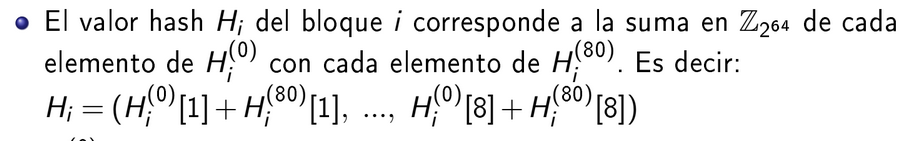

In [ ]:
text="casa"
msg=padd(text)
print("tamaño del bloque:",len(msg))
#obtencion de los w para el bloque 1
w=Ws(msg)
#buffer inicialización
H11="6a09e667f3bcc908"
H12="bb67ae8584caa73b"
H13="3c6ef372fe94f82b"
H14="a54ff53a5f1d36f1"
H15="510e527fade682d1"
H16="9b05688c2b3e6c1f"
H17="1f83d9abfb41bd6b"
H18="5be0cd19137e2179"
H11=hexbufbin(H11)
H12=hexbufbin(H12)
H13=hexbufbin(H13)
H14=hexbufbin(H14)
H15=hexbufbin(H15)
H16=hexbufbin(H16)
H17=hexbufbin(H17)
H18=hexbufbin(H18)

#--------------80 rondas--------------------------
#Ronda 1:
comp=compresion(H11,H12,H13,H14,H15,H16,H17,H18,k[0],w[0])
compinit=comp
#print("a=",a['a'])
print("ronda 1:")
for key in comp:
  print(comp[key])
#Rondas 2-80:
for i in range(1,80):
  comp=compresion(comp['a'],comp['b'],comp['c'],comp['d'],comp['e'],comp['f'],comp['g'],comp['h'],k[i],w[i])
  #print(i,len(comp))
print("ronda 80:")
for key in comp:
  print(comp[key])
compfin=comp 
#valor hash para el bloque 1
for key in compinit:
  a=int(compinit[key],2)+int(compfin[key],2)
  a=bin(a)[2:].zfill(64)
  comp[key]=a
  #print(key,comp[key],len(comp[key]))
  if len(a)>64:
    c=len(comp[key])-64
    comp[key]=comp[key][c:]
  #print(key,comp[key],len(comp[key]))
print("-------------------------------")
for key in comp:
  print(hex(int(comp[key],2)))
  

tamaño del bloque: 1024
ronda 1:
1111100010101110110111101001101000111100111111001101110111110101
0110101000001001111001100110011111110011101111001100100100001000
1011101101100111101011101000010110000100110010101010011100111011
0011110001101110111100110111001011111110100101001111100000101011
0101101011001010000100100001010111111010101101010001111110010001
0101000100001110010100100111111110101101111001101000001011010001
1001101100000101011010001000110000101011001111100110110000011111
0001111110000011110110011010101111111011010000011011110101101011
ronda 80:
1110110101100101100000011110101000101101011100111001010011100001
1000001010010100001111111011001101101110101111011000100011001101
0101111000001000010001011011011101011111010010000000111010100100
0001000101010000011010110100100011111110100111100110011100000010
0010011111100001000001111111111101011010000100010010000011100101
0001001000101100000010000110101101100011101110001010100101101111
00100001010011111010100101010100010100101010001

In [ ]:
print(hex(int(comp['a'],2)))

0xe61460846a7072d6


5